In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


import joblib

In [2]:
X=pd.read_csv('cleaned data fakenews')

In [3]:
y=pd.read_csv('cleaned data fakenews(y)target')

In [4]:
X.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,210,211,212,213,214,215,216,217,218,219
0,0,3225,3499,2464,4710,3526,1522,4710,4199,2704,...,530,2234,1634,2039,2920,3028,238,3840,4341,2122
1,1,3283,4537,3341,992,2912,3327,451,3630,2593,...,4861,3889,4035,2521,1977,1645,3347,2839,321,321
2,2,0,0,0,0,0,0,0,0,0,...,3593,1102,4453,4482,21,1373,4033,637,3749,4851
3,3,2415,2337,3667,2296,1081,3330,3630,3439,414,...,2978,3911,3689,3308,4710,2395,3623,2625,2608,4516
4,4,2435,2929,1021,1617,1204,3789,2669,4827,4927,...,2379,3430,3958,3689,3245,3583,4477,3459,2428,2741


In [5]:
X=X.drop('Unnamed: 0',axis=1)

In [6]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,3225,3499,2464,4710,3526,1522,4710,4199,2704,3483,...,530,2234,1634,2039,2920,3028,238,3840,4341,2122
1,3283,4537,3341,992,2912,3327,451,3630,2593,2839,...,4861,3889,4035,2521,1977,1645,3347,2839,321,321
2,0,0,0,0,0,0,0,0,0,0,...,3593,1102,4453,4482,21,1373,4033,637,3749,4851
3,2415,2337,3667,2296,1081,3330,3630,3439,414,136,...,2978,3911,3689,3308,4710,2395,3623,2625,2608,4516
4,2435,2929,1021,1617,1204,3789,2669,4827,4927,3471,...,2379,3430,3958,3689,3245,3583,4477,3459,2428,2741


In [7]:
y.head()

,Unnamed: 0,index,label
0,0,0,0
1,1,1,0
2,2,2,0
3,3,3,0
4,4,4,1


In [8]:
y=y.drop(['Unnamed: 0','index'],axis=1)

In [9]:
y.head()

,label
0,0
1,0
2,0
3,0
4,1


In [10]:
y=y[['label']]
X=X

# Minmax scaler(standard scaler gives negative value which gives error in MultnomialNB)

In [11]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X=mm.fit_transform(X)
X=pd.DataFrame(data=X)

# train_test_split

In [12]:
from sklearn.model_selection import train_test_split
                                                      #X               #y
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20, random_state = 0,stratify=y)

In [13]:
X_train.shape, y_train.shape

((14628, 220), (14628, 1))

# Model building

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [15]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [16]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('MultinomialNB',mnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score

In [18]:
from sklearn.model_selection import train_test_split,cross_val_score

In [19]:
from sklearn.exceptions import FitFailedWarning
import warnings
warnings.simplefilter('always', FitFailedWarning)
import warnings
warnings.filterwarnings('ignore')

***************** KNeighborsClassifier *******************


KNeighborsClassifier()


Accuracy_score  - 0.6037735849056604


cross_val_score  - 0.6069455838118676


roc_auc_score  - 0.5930240064309465


Recall_score  - 0.5123028391167193


classification report
               precision    recall  f1-score   support

           0       0.64      0.67      0.66      2072
           1       0.55      0.51      0.53      1585

    accuracy                           0.60      3657
   macro avg       0.59      0.59      0.59      3657
weighted avg       0.60      0.60      0.60      3657



[[1396  676]
 [ 773  812]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** SVC *******************


SVC()


Accuracy_score  - 0.6625649439431228


cross_val_score  - 0.6644243915777961


roc_auc_score  - 0.627259813892306


Recall_score  - 0.3621451104100946


classification report
               precision    recall  f1-score   support

           0       0.65      0.89      0.75      2

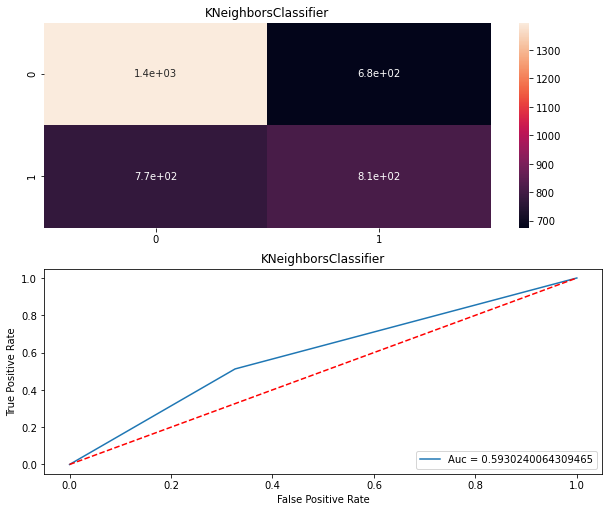

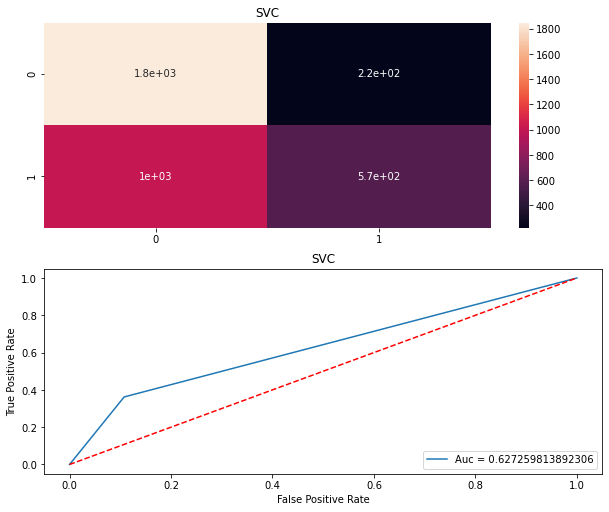

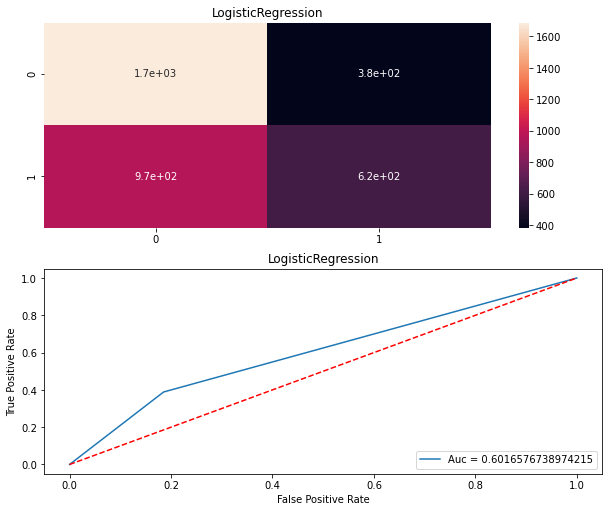

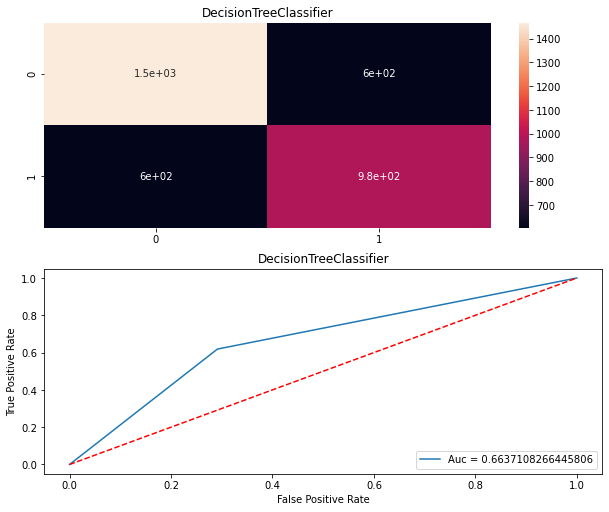

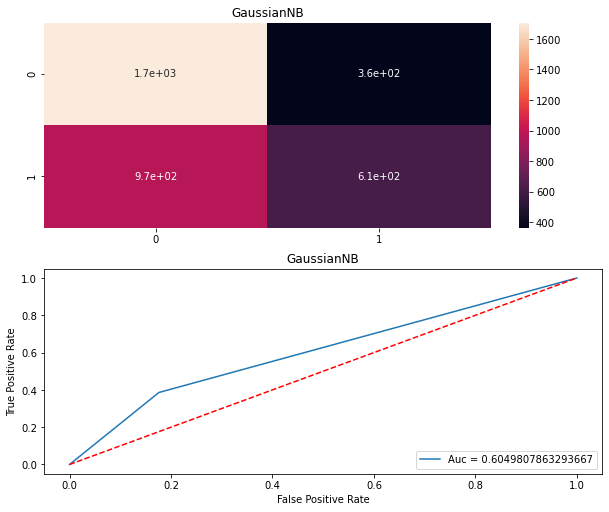

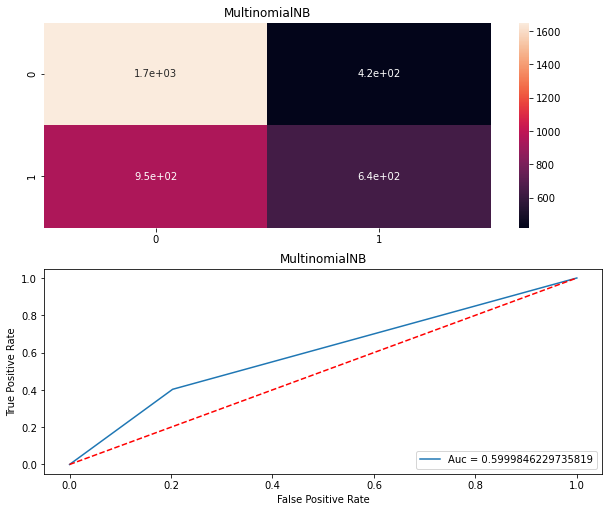

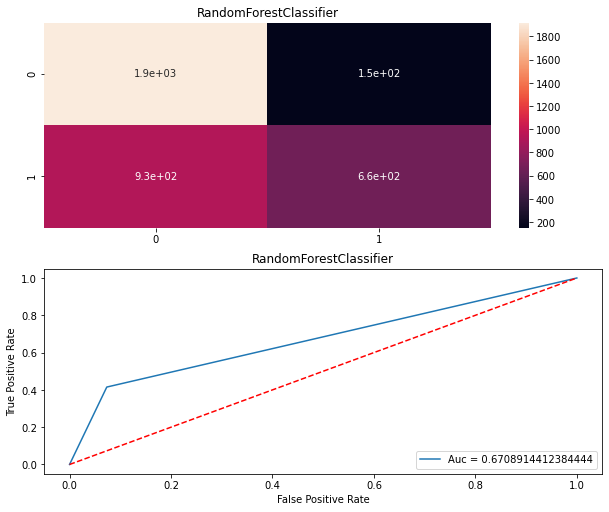

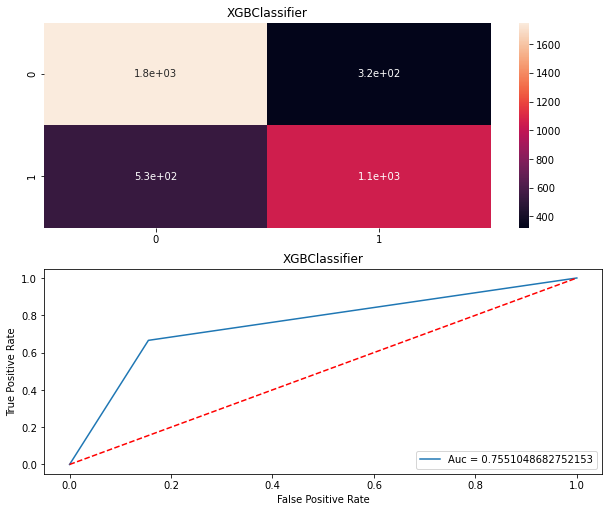

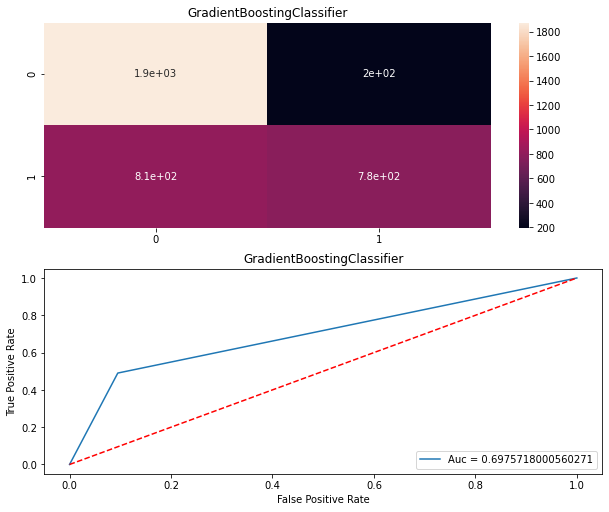

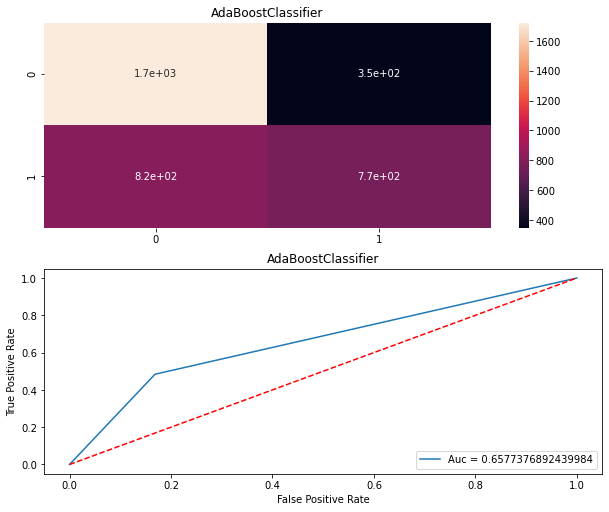

In [20]:
Model=[]
score=[]
cv=[]
rocscore=[]
recall=[]
for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre=model.predict(X_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X, y,cv=5,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    
    fpr,tpr,threshold=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print('roc_auc_score  -',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    re=recall_score(y_test,pre)
    print('Recall_score  -',re)
    recall.append(re*100)
    print('\n')
    
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr,tpr,label='Auc = ' +str(roc_auc))
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [23]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'cross_val_score':cv,'Recall_score':recall,'auc_score':rocscore})
result

,Model,Accuracy_score,cross_val_score,Recall_score,auc_score
0,KNeighborsClassifier,60.377358,60.694558,51.230284,59.302401
1,SVC,66.256494,66.442439,36.214511,62.725981
2,LogisticRegression,63.002461,64.129068,38.864353,60.165767
3,DecisionTreeClassifier,66.967460,65.835384,61.892744,66.371083
4,GaussianNB,63.412633,63.505606,38.611987,60.498079
5,MultinomialNB,62.619634,62.493847,40.315457,59.998462
6,RandomForestClassifier,70.494941,70.112114,41.514196,67.089144
7,XGBClassifier,76.702215,77.068635,66.561514,75.510487
8,GradientBoostingClassifier,72.518458,72.551272,49.022082,69.757180
9,AdaBoostClassifier,68.088597,68.498769,48.391167,65.773769


In [ ]:
#We can see from the table above XGBClassifier are the best performing Algorithms.

#to improve the score we will apply gridsearchcv technique to the xgb models.

In [ ]:
#First lets calculate the random state of the models at which it perform the best.
#Then we will use xgb model and do gridsearchcv on it to attain our target accuracy .

# Finding the best random_state 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxaccuracy_score(model,x,y):
    max_accuracy=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>max_accuracy:
            max_accuracy=score
            final_r_state=r_state
    print('max_accuracy_score is at random_state  ',final_r_state,'  which is  ',max_accuracy)
    return final_r_state

In [26]:
#print('knn',maxaccuracy_score(knn,x,y))
#print('svc',maxaccuracy_score(svc,x,y))
#print('lr',maxaccuracy_score(lr,x,y))
#print('dt',maxaccuracy_score(dt,x,y))
#print('gnb',maxaccuracy_score(gnb,x,y))
#print('rfc',maxaccuracy_score(rfc,x,y))

print('xgb',maxaccuracy_score(xgb,X,y))

#print('gbc',maxaccuracy_score(gbc,x,y))
#print('ada',maxaccuracy_score(ada,x,y))

max_accuracy_score is at random_state   91   which is   0.7801837270341208
xgb 91


#Selecting the xgb  model for gridsearchcv as its taking a lot of time.

model1->XGBClassifier(random_state=91)=78.018%


# GridSearchCV

# model1->XGBClassifier(random_state=91)=78.018%

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=91,stratify=y)
xgb=XGBClassifier()

In [30]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.001,0.1,0.2],'max_depth':[3,5,8],'colsample_bytree':[0.5,0.7,0.9]}]
            
gscv=GridSearchCV(xgb,parameters,scoring='recall',n_jobs=-1,cv=5)
gscv_search=gscv.fit(X,y)
gscv_search.best_params_

{'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 5}

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=91,stratify=y)
xgb=XGBClassifier(colsample_bytree=0.7, learning_rate=0.2, max_depth=5)
xgb.fit(X,y)
pred=xgb.predict(x_test)
print('Accuracy= '     ,accuracy_score(y_test,pred))
print('recall_score=  ',recall_score(y_test,pred))
print('roc_score='     ,roc_auc_score(y_test,pred))

Accuracy=  0.9381014873140857
recall_score=   0.9126703685007572
roc_score= 0.9351078588933737


In [32]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier(colsample_bytree=0.7, learning_rate=0.2, max_depth=5)
cvs=cross_val_score(xgb,X,y,scoring='recall',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,X,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.657245642545327


array([[8904, 2716],
       [1457, 5208]], dtype=int64)

# Saving the XgboostClassifier model

In [36]:
# XGBClassifier model cross_val_score is best=65.724 %,
#corresponding random_state=91
#Hence saving the final model as XGBClassifier.

x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=91)
xgb=XGBClassifier(colsample_bytree=0.7, learning_rate=0.2, max_depth=5)
xgb.fit(X,y)
pred=xgb.predict(x_test)
print('recall_score=  ',recall_score(y_test,pred))
print('roc_score='     ,roc_auc_score(y_test,pred))
print('Accuracy=  ',accuracy_score(y_test,pred))

recall_score=   0.9121588089330025
roc_score= 0.9339831979745186
Accuracy=   0.9365704286964129


In [37]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier(colsample_bytree=0.7, learning_rate=0.2, max_depth=5)
xgb.fit(X,y)
cvs=cross_val_score(xgb,X,y,scoring='recall',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,X,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.657245642545327


array([[8904, 2716],
       [1457, 5208]], dtype=int64)

# Saving the model

In [38]:
import joblib
joblib.dump(xgb,'fakenewsxgbmodel.obj')

['fakenewsxgbmodel.obj']

# Loading the model

In [39]:
model=joblib.load('fakenewsxgbmodel.obj')

# Predicting on test data

In [40]:
Final_predictions=model.predict(x_test)
Final_predictions=pd.DataFrame(Final_predictions,columns=['Fake yes(1)no(0)'])
Final_predictions[:5]

,Fake yes(1)no(0)
0,1
1,1
2,1
3,0
4,0


# Saving final predictions in file.csv format

In [41]:
Final_predictions.to_csv('final_predictions_fakenew.csv',index=False)

# Conclusion

In [ ]:
#1-Wether the fakenews(1) or goodnews(0) can be predicted using the model above. 
#2-By using sklearn(XGboost) I have build a machine learning model that will predict wether the news is fake(1) or not fake(good news(0)).
